In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import combinations

In [2]:
data_path = Path('./data/transform/')
driver_df = pd.read_csv(data_path / 'driver.csv', sep='|')
car_df = pd.read_csv(data_path / 'car.csv', sep='|')

In [3]:
track_cols = [col for col in driver_df.columns if (len(col) == 3 and col.isupper()) or col.endswith('.1') or col.endswith('.2')]
keep_track_cols = list(driver_df[track_cols].sum()[driver_df[track_cols].sum() > 0].index)
keep_track_cols

['BAH',
 'SAU',
 'AUS',
 'ITA',
 'USA',
 'SPA',
 'MON',
 'AZE',
 'CAN',
 'BRI',
 'AUS.1',
 'FRA',
 'HUN',
 'BEL',
 'NET']

## Driver and Car Combos

Pick 5 + 1

If the purpose of the game was to pick a lineup and keep it, this analysis would show the optimal lineups so far, maximizing average points within a budget constraint.

In [4]:
driver_df['Current Price'].sum()

280.59999999999997

In [5]:
min_car_price = car_df['Current Price'].min()
max_car_price = car_df['Current Price'].max()

### All driver combos within budget range

In [6]:
driver_df

,Driver,BAH,SAU,AUS,ITA,USA,SPA,MON,AZE,CAN,...,pts_price,pts_price_med,last_name,pts,price,Driver_price,Current Price,Season Start PriceSeason Price,Points/Million,diff_price
0,Hamilton Mercedes,34,13,26,5,19,21,11,26,48,...,23.818796,23.697272,Hamilton,0,0,Lewis Hamilton HAM Mercedes,30.6,31.0,0.85,-6.781204
1,Verstappen Red Bull,5,45,4,62,56,45,28,54,44,...,37.368774,41.014508,Verstappen,1,1,Max Verstappen VER Red Bull,30.4,30.5,1.35,6.968774
2,Russell Mercedes,28,26,33,33,36,33,26,34,27,...,27.464530,27.343006,Russell,2,2,George Russell RUS Mercedes,23.8,24.0,1.27,3.664530
3,Perez Red Bull,4,22,35,44,28,49,46,38,-8,...,24.001083,25.520139,Perez,3,4,Sergio Perez PER Red Bull,17.9,17.5,1.47,6.101083
4,Alonso Alpine,9,-3,-5,2,5,14,19,22,7,...,13.246167,12.760069,Alonso,4,9,Fernando Alonso ALO Alpine,12.7,12.5,1.14,0.546167
5,Leclerc Ferrari,49,41,49,30,50,5,22,5,23,...,25.884712,20.962971,Leclerc,5,3,Charles Leclerc LEC Ferrari,18.7,18.0,1.52,7.184712
6,Gasly AlphaTauri,-4,17,14,13,-1,5,15,26,11,...,8.992811,11.848636,Gasly,6,8,Pierre Gasly GAS AlphaTauri,13.0,13.5,0.76,-4.007189
7,Vettel Aston Martin,4,15,-7,24,-5,17,10,25,14,...,11.058727,12.760069,Vettel,7,11,Sebastian Vettel VET Aston Martin,11.8,11.5,1.03,-0.741273
8,Sainz Ferrari,32,27,-5,7,31,25,34,0,42,...,21.388307,24.608705,Sainz,8,5,SAI Carlos Sainz Ferrari,17.2,17.0,1.36,4.188307
9,Tsunoda AlphaTauri,19,-9,-1,30,3,15,-5,-3,-9,...,3.159636,-0.911434,Tsunoda,9,14,Yuki Tsunoda TSU AlphaTauri,8.4,8.5,0.41,-5.240364


In [7]:
driver_df.columns

Index(['Driver', 'BAH', 'SAU', 'AUS', 'ITA', 'USA', 'SPA', 'MON', 'AZE', 'CAN',
       'BRI', 'AUS.1', 'FRA', 'HUN', 'BEL', 'NET', 'ITA.1', 'SIN', 'JAP',
       'USA.1', 'MEX', 'BRA', 'ABU', 'Total', 'avg', 'avg_8r', 'avg_4r', 'max',
       'median', 'pts_price', 'pts_price_med', 'last_name', 'pts', 'price',
       'Driver_price', 'Current Price', 'Season Start PriceSeason Price',
       'Points/Million', 'diff_price'],
      dtype='object')

In [8]:
combos = []
total_budget = 112.0
min_cols = ['last_name', 'diff_price', 'Current Price', 'avg', 'avg_8r', 'avg_4r']
a_cols = min_cols + keep_track_cols

# Build a list of frames with all combinations of 5 drivers (20 c 5)
# Constrained to realistic expectations: wouldn't select all of the most expensive or least expensive drivers

for i, index in enumerate(list(combinations(driver_df.index, 5))):
    cost = driver_df.loc[index, ['Current Price']].sum()[0]  # filter for combination and sum Prices
    if cost < total_budget - min_car_price and cost > total_budget - max_car_price:
        combos.append(pd.DataFrame(driver_df.loc[index, a_cols].sum()).T)
        
        

In [9]:
combo_df = pd.concat(combos).sort_values(by='avg_4r', ascending=False)
combo_df[:200]

,last_name,diff_price,Current Price,avg,avg_8r,avg_4r,BAH,SAU,AUS,ITA,...,SPA,MON,AZE,CAN,BRI,AUS.1,FRA,HUN,BEL,NET
0,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,166,153,148,112,139,120,152,143,166,172
0,VerstappenRussellAlonsoLeclercSainz,22.55249,102.8,137.533333,145.625,151.5,123,136,76,134,...,122,129,115,143,125,176,135,134,154,183
0,VerstappenRussellPerezAlonsoLeclerc,24.465266,103.5,140.4,141.375,150.75,95,131,116,171,...,146,141,153,93,112,170,125,131,155,192
0,VerstappenRussellPerezSainzOcon,22.780294,101.6,136.466667,136.25,149.5,89,141,87,159,...,176,135,136,126,94,136,144,137,156,161
0,VerstappenRussellPerezSainzNorris,20.274015,105.2,137.666667,137.0,149.5,70,142,91,189,...,168,160,137,106,124,131,146,147,148,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,VerstappenRussellVettelSainzZhou,10.051408,91.3,111.2,120.625,130.25,83,123,34,134,...,112,108,107,142,82,113,124,128,135,134
0,VerstappenPerezAlonsoLeclercNorris,20.152057,95.6,127.0,126.875,130.25,68,127,107,181,...,129,141,130,67,133,164,112,120,131,158
0,VerstappenRussellLeclercVettelStroll,19.03547,93.8,123.8,126.25,130.0,101,136,94,164,...,108,96,126,124,70,170,107,123,129,161
0,VerstappenRussellPerezAlonsoBottas,17.806323,94.3,123.0,122.0,130.0,68,88,87,175,...,164,145,162,90,82,122,126,116,126,152


In [10]:
combo_df.sort_values(by='NET', ascending=False)

,last_name,diff_price,Current Price,avg,avg_8r,avg_4r,BAH,SAU,AUS,ITA,...,SPA,MON,AZE,CAN,BRI,AUS.1,FRA,HUN,BEL,NET
0,VerstappenRussellAlonsoLeclercOcon,20.221784,97.9,129.6,134.875,141.0,111,130,101,140,...,121,96,125,122,68,200,118,114,137,195
0,VerstappenRussellPerezAlonsoLeclerc,24.465266,103.5,140.4,141.375,150.75,95,131,116,171,...,146,141,153,93,112,170,125,131,155,192
0,VerstappenRussellAlonsoLeclercNorris,17.715505,101.5,130.8,135.625,141.0,92,131,105,170,...,113,121,126,102,98,195,120,124,129,191
0,VerstappenRussellAlonsoLeclercAlbon,18.624036,93.3,122.8,129.375,137.25,101,122,86,141,...,103,88,132,107,67,180,115,115,133,186
0,VerstappenRussellAlonsoLeclercVettel,17.62291,97.4,126.2,136.0,141.0,95,124,74,151,...,114,105,140,115,95,174,114,124,142,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,HamiltonGaslySainzBottasRicciardo,-14.805717,84.5,76.466667,78.125,62.5,97,47,73,64,...,76,91,84,128,79,84,98,80,37,35
0,HamiltonTsunodaBottasRicciardoNorris,-20.875877,78.6,63.333333,57.0,40.75,89,16,87,117,...,77,63,66,67,62,98,68,53,8,34
0,HamiltonSainzBottasZhouRicciardo,-14.827458,79.6,71.066667,71.125,55.0,115,40,68,59,...,63,86,52,132,82,83,91,69,27,33
0,HamiltonGaslySainzTsunodaBottas,-11.314682,78.7,73.933333,72.25,63.25,103,46,54,89,...,89,81,63,112,78,72,87,82,54,30


## Driver Combos + Car

In [11]:
all_combo = combo_df.merge(car_df, how='cross', suffixes=['', '_car'])

In [12]:
all_combo

,last_name,diff_price,Current Price,avg,avg_8r,avg_4r,BAH,SAU,AUS,ITA,...,avg_8r_car,avg_4r_car,max,median,pts_price,pts_price_med,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car
0,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,55.375,56.50,76,55.0,33.788971,36.678818,34.2,34.5,1.48,-0.411029
1,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,59.375,68.75,99,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306
2,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,28.125,30.25,40,23.0,15.427333,15.338415,14.1,14.0,1.64,1.327333
3,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,43.375,40.00,76,47.0,30.988043,31.343717,25.8,25.0,1.80,5.188043
4,VerstappenRussellPerezAlonsoSainz,21.468861,102.0,135.466667,144.0,158.25,78,117,62,148,...,5.875,8.75,36,6.0,5.379560,4.001326,10.2,10.5,0.79,-4.820440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43795,HamiltonTsunodaBottasRicciardoNorris,-20.875877,78.6,63.333333,57.0,40.75,89,16,87,117,...,22.625,21.75,32,20.0,12.670864,13.337752,11.8,11.5,1.61,0.870864
43796,HamiltonTsunodaBottasRicciardoNorris,-20.875877,78.6,63.333333,57.0,40.75,89,16,87,117,...,2.375,-3.25,35,7.0,6.491039,4.668213,8.6,8.0,1.13,-2.108961
43797,HamiltonTsunodaBottasRicciardoNorris,-20.875877,78.6,63.333333,57.0,40.75,89,16,87,117,...,5.875,6.50,26,8.0,5.646315,5.335101,6.2,7.0,1.37,-0.553685
43798,HamiltonTsunodaBottasRicciardoNorris,-20.875877,78.6,63.333333,57.0,40.75,89,16,87,117,...,10.500,4.00,38,5.0,5.157264,3.334438,6.4,6.0,1.21,-1.242736


In [13]:
save_path = Path('./data/transform')

In [14]:
all_combo.to_csv(save_path / 'combo.csv', sep='|', index=False)


In [15]:
all_combo['total_diff_price'] = all_combo['diff_price'] + all_combo['diff_price_car']
all_combo['total_price'] = all_combo['Current Price'] + all_combo['Current Price_car']
all_combo['total_avg'] = all_combo['avg'] + all_combo['avg_car']

## Combos Filtered for Budget

In [16]:
all_combo_b = all_combo[all_combo['total_price'] < total_budget].sort_values(by='total_avg', ascending=False).reset_index()

In [17]:
all_combo_b.head(50)[['last_name', 'Team', 'total_avg', 'total_diff_price', 'total_price']]

,last_name,Team,total_avg,total_diff_price,total_price
0,PerezAlonsoLeclercSainzOcon,Red Bull,169.0,27.680176,111.5
1,RussellPerezLeclercBottasStroll,Red Bull,168.733333,27.237127,111.7
2,RussellPerezLeclercOconMagnussen,Red Bull,168.066667,26.829504,111.5
3,PerezLeclercSainzStrollNorris,Red Bull,167.8,26.586455,111.5
4,RussellPerezAlonsoLeclercMagnussen,Red Bull,167.066667,25.518071,111.9
5,RussellPerezLeclercOconSchumacher,Red Bull,167.0,25.657309,111.7
6,VerstappenPerezOconBottasStroll,Red Bull,166.733333,25.21426,111.9
7,PerezLeclercSainzBottasNorris,Red Bull,166.666667,25.153497,111.9
8,PerezLeclercVettelSainzOcon,Red Bull,166.6,26.392735,110.6
9,VerstappenLeclercOconStrollAlbon,Red Bull,166.533333,26.031973,110.9


## 5 Driver Combos

<AxesSubplot:>

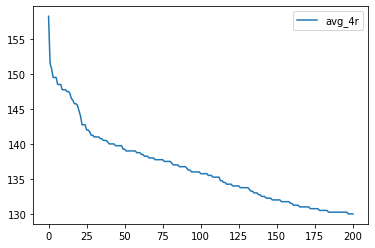

In [18]:
combo_df.sort_values(by='avg_4r', ascending=False).reset_index().loc[0:200, ['avg_4r']].plot()

## Five Driver + Car Combos

<AxesSubplot:>

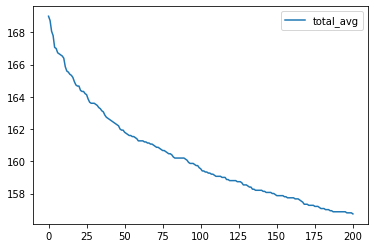

In [19]:
all_combo_b.sort_values(by='total_avg', ascending=False).reset_index().loc[0:200, ['total_avg']].plot()

In [20]:
all_combo_b.sort_values(by='total_avg', ascending=False).head(50)

,index,last_name,diff_price,Current Price,avg,avg_8r,avg_4r,BAH,SAU,AUS,...,median,pts_price,pts_price_med,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
0,17641,PerezAlonsoLeclercSainzOcon,19.877869,78.8,108.266667,105.0,104.5,114,108,94,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,27.680176,111.5,169.0
1,33561,RussellPerezLeclercBottasStroll,19.43482,79.0,108.0,88.5,85.75,118,96,152,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,27.237127,111.7,168.733333
2,26751,RussellPerezLeclercOconMagnussen,19.027198,78.8,107.333333,92.875,94.25,128,124,143,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,26.829504,111.5,168.066667
3,27471,PerezLeclercSainzStrollNorris,18.784149,78.8,107.066667,96.0,93.5,101,121,118,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,26.586455,111.5,167.8
4,19101,RussellPerezAlonsoLeclercMagnussen,17.715764,79.2,106.333333,100.625,103.0,117,100,118,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.518071,111.9,167.066667
5,24151,RussellPerezLeclercOconSchumacher,17.855002,79.0,106.266667,97.625,97.25,106,102,149,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.657309,111.7,167.0
6,23121,VerstappenPerezOconBottasStroll,17.411953,79.2,106.0,97.0,98.5,66,95,94,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.21426,111.9,166.733333
7,38341,PerezLeclercSainzBottasNorris,17.351191,79.2,105.933333,86.75,78.0,108,110,123,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.153497,111.9,166.666667
8,25311,PerezLeclercVettelSainzOcon,18.590429,77.9,105.866667,98.375,95.75,109,126,92,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,26.392735,110.6,166.6
9,16471,VerstappenLeclercOconStrollAlbon,18.229667,78.2,105.8,104.375,105.75,99,129,93,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,26.031973,110.9,166.533333


## Best Combos Containing

* Verstappen

In [21]:
all_combo_b[all_combo_b['last_name'].str.contains('Verstappen')].head(50)

,index,last_name,diff_price,Current Price,avg,avg_8r,avg_4r,BAH,SAU,AUS,...,median,pts_price,pts_price_med,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
6,23121,VerstappenPerezOconBottasStroll,17.411953,79.2,106.0,97.0,98.5,66,95,94,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.21426,111.9,166.733333
9,16471,VerstappenLeclercOconStrollAlbon,18.229667,78.2,105.8,104.375,105.75,99,129,93,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,26.031973,110.9,166.533333
10,19981,VerstappenLeclercSainzMagnussenSchumacher,17.608142,78.7,105.666667,109.625,102.25,118,119,66,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,25.410449,111.4,166.4
13,9731,VerstappenAlonsoLeclercStrollAlbon,16.918233,78.6,104.8,112.125,114.5,88,105,68,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,24.720539,111.3,165.533333
14,30401,VerstappenLeclercOconBottasAlbon,16.796709,78.6,104.666667,95.125,90.25,106,118,98,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,24.599015,111.3,165.4
15,20623,VerstappenPerezLeclercBottasStroll,22.739065,85.6,118.866667,105.125,101.5,95,115,123,...,47.0,30.988043,31.343717,25.8,25.0,1.80,5.188043,27.927108,111.4,165.333333
18,21731,VerstappenLeclercVettelOconMagnussen,15.489086,79.3,104.0,104.125,100.25,105,136,72,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,23.291393,112.0,164.733333
19,12933,VerstappenPerezLeclercOconMagnussen,22.331442,85.4,118.2,109.5,110.0,105,143,114,...,47.0,30.988043,31.343717,25.8,25.0,1.80,5.188043,27.519486,111.2,164.666667
21,22771,VerstappenAlonsoLeclercBottasAlbon,15.485275,79.0,103.666667,102.875,99.0,95,94,73,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,23.287581,111.7,164.4
22,13781,VerstappenPerezSainzMagnussenSchumacher,16.524513,77.9,103.6,108.0,109.0,73,100,52,...,63.0,40.502306,42.013918,32.7,32.5,1.86,7.802306,24.326819,110.6,164.333333


## Set your own limit

In [22]:
report_cols = ['last_name', 'Team', 'total_price', 'diff_price', 'total_avg', 'total_diff_price']
my_price = 108.0

my_c = all_combo_b.loc[all_combo_b['total_price'] < my_price, report_cols].sort_values(by='total_avg', ascending=False)
my_c.head(50)

,last_name,Team,total_price,diff_price,total_avg,total_diff_price
60,VerstappenPerezLeclercStrollMagnussen,Ferrari,108.0,22.432568,161.266667,27.620612
114,RussellPerezLeclercOconStroll,Ferrari,107.6,20.766652,159.0,25.954696
132,VerstappenLeclercSainzStrollMagnussen,Ferrari,107.3,20.519792,158.4,25.707836
151,VerstappenPerezLeclercAlbonMagnussen,Ferrari,106.6,20.733694,157.866667,25.921738
169,VerstappenLeclercSainzStrollSchumacher,Ferrari,107.5,19.347596,157.333333,24.53564
171,VerstappenLeclercSainzBottasMagnussen,Ferrari,107.7,19.086834,157.266667,24.274878
185,PerezLeclercSainzOconNorris,Ferrari,107.8,18.683023,156.933333,23.871066
198,VerstappenPerezLeclercAlbonSchumacher,Ferrari,106.8,19.561498,156.8,24.749542
214,VerstappenPerezSainzStrollMagnussen,Ferrari,106.5,19.436163,156.333333,24.624206
219,VerstappenLeclercSainzBottasSchumacher,Ferrari,107.9,17.914638,156.2,23.102682


## How many times do Drivers end up in the top 50 combos?

In [23]:
driver_names = driver_df.Driver.str.split(" ", expand=True).loc[:, [0]]
driver_names.columns = ['last_name']
driver_names

,last_name
0,Hamilton
1,Verstappen
2,Russell
3,Perez
4,Alonso
5,Leclerc
6,Gasly
7,Vettel
8,Sainz
9,Tsunoda


In [24]:
combos = [25, 50, 100, 200]
dn_crosses = []

for c in combos:

    dn_cross = driver_names.merge(my_c['last_name'].head(c), how='cross', suffixes=['', '_cross'])
    dn_cross['member'] = dn_cross.apply(lambda x: x['last_name'] in x['last_name_cross'], axis=1).astype(int)
    dn_crosses.append(dn_cross.groupby('last_name')['member'].sum())
    
dn_cross = pd.concat(dn_crosses, axis=1)
dn_cross.columns = [f'top_{c}' for c in combos]
dn_cross = dn_cross.sort_values(by='top_50', ascending=False)

for c in combos:
    col = f'pct_top_{c}'
    dn_cross[col] = dn_cross[f'top_{c}'] / c

dn_cross

,top_25,top_50,top_100,top_200,pct_top_25,pct_top_50,pct_top_100,pct_top_200
last_name,,,,,,,,
Leclerc,22,38,72,126,0.88,0.76,0.72,0.630
Perez,15,33,57,105,0.60,0.66,0.57,0.525
Verstappen,15,31,63,132,0.60,0.62,0.63,0.660
Sainz,13,28,48,97,0.52,0.56,0.48,0.485
Stroll,10,20,34,57,0.40,0.40,0.34,0.285
Russell,8,15,34,68,0.32,0.30,0.34,0.340
Ocon,8,14,33,66,0.32,0.28,0.33,0.330
Magnussen,8,14,24,48,0.32,0.28,0.24,0.240
Bottas,6,13,25,42,0.24,0.26,0.25,0.210


In [25]:
dn_cross.to_markdown()

'| last_name   |   top_25 |   top_50 |   top_100 |   top_200 |   pct_top_25 |   pct_top_50 |   pct_top_100 |   pct_top_200 |\n|:------------|---------:|---------:|----------:|----------:|-------------:|-------------:|--------------:|--------------:|\n| Leclerc     |       22 |       38 |        72 |       126 |         0.88 |         0.76 |          0.72 |         0.63  |\n| Perez       |       15 |       33 |        57 |       105 |         0.6  |         0.66 |          0.57 |         0.525 |\n| Verstappen  |       15 |       31 |        63 |       132 |         0.6  |         0.62 |          0.63 |         0.66  |\n| Sainz       |       13 |       28 |        48 |        97 |         0.52 |         0.56 |          0.48 |         0.485 |\n| Stroll      |       10 |       20 |        34 |        57 |         0.4  |         0.4  |          0.34 |         0.285 |\n| Russell     |        8 |       15 |        34 |        68 |         0.32 |         0.3  |          0.34 |         0.34  |\